## DBScan Clustering

It is a data clustering algorithm, It is a density based algorithm, given a set of points, it groups together points that are closely packed together.

In this algorithm , we need not specify the k value, the algorithm itself finds relevant clusters.



Unlike K-Means, DBSCAN:
- Does **not require the number of clusters `k`** to be specified.
- Can find **arbitrarily shaped clusters**.
- Can **detect outliers** (noise).


##  Key Concepts

 1. ε (epsilon)
- The radius of the neighborhood around a point.

2. `min_samples`
- Minimum number of points required in an ε-neighborhood for a point to be considered a **core point**.

3. Types of Points
- **Core Point**: Has at least `min_samples` points within its ε-radius (including itself).
- **Border Point**: Fewer than `min_samples` points in ε-radius but is within the ε-radius of a core point.
- **Noise (Outlier)**: Neither a core point nor within ε-radius of any core point.


## DBSCAN Algorithm Steps

1. For each unvisited point:
   - Mark the point as visited.
   - Find all points within ε (its neighbors).
   - If neighbors ≥ `min_samples`(Once DBSCAN finds a **core point** (with at least `min_samples` neighbors within ε):):
      - Start a new cluster.
      -  Adds all the neighboring points to the current cluster.
      -  **checks each of those neighbors**:
          - If a neighbor is also a **core point**, DBSCAN:
              - Finds its own ε-neighbors
              - Adds them to the cluster
              - **Repeats this process recursively**
            This is how DBSCAN **grows a cluster outward** by walking through the chain of core points.
   - Else:
     - Mark it as noise.
2. Repeat until all points are visited.


## Advantages and Disadvantages

1) Advantages:

- No need to select the number of clusters beforehand.
- Finds all the arbitrarily shaped clusters
- Finds the noise in a robust way.
- can find non-linearly seperable clusters.
- Has O(NlogN) running time

2) Disadvantages:

- Relies on the distance metrics, hard to find a good value of epsilon
- Especially compared to K-Means, due to **neighborhood queries** for each point. 


Used extensively in geo spatial analysis

### DBSCAN Algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1500, noise=0.05, random_state=42)
print(X)

[[ 0.97283794 -0.49951516]
 [ 1.84844905  0.02504018]
 [-0.129004    1.01439792]
 ...
 [ 0.0973423   0.03751807]
 [ 1.91061504  0.33279774]
 [ 1.1039567  -0.50641698]]


Text(0.5, 1.0, 'Moon dataset')

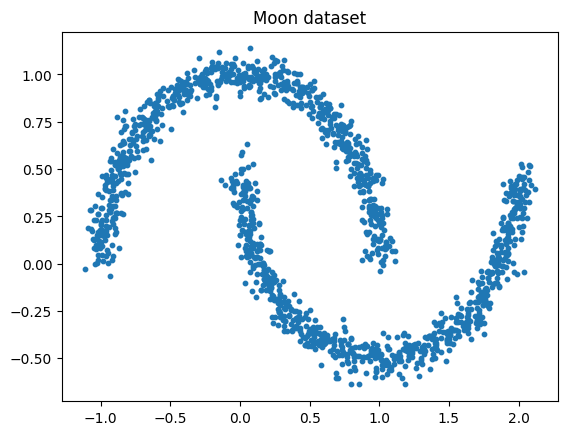

In [3]:
x1=X[:,0]
x2=X[:,1]
plt.scatter(x1, x2, s=10)
plt.title("Moon dataset")

In [4]:
dbscan= DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
y_pred=dbscan.labels_
print(y_pred)

[0 0 1 ... 0 0 0]


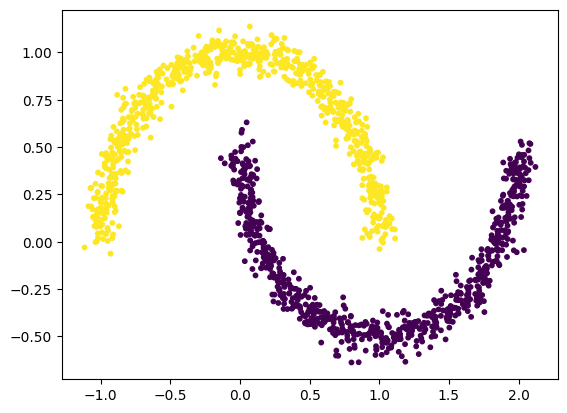

In [5]:
plt.scatter(x1, x2, c=y_pred, s=10, cmap='viridis')

Text(0.5, 1.0, 'KMeans Clustering on Moon Dataset')

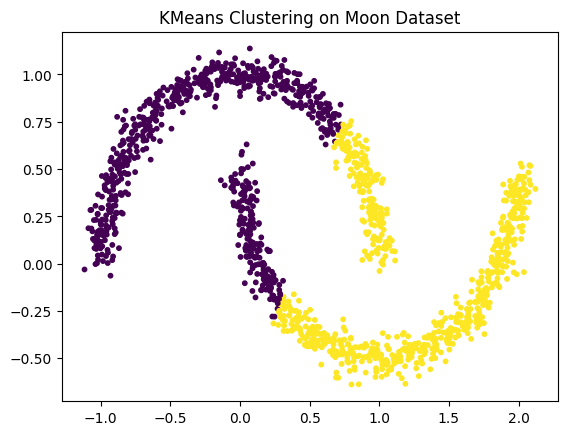

In [6]:
## If we use k means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_
plt.scatter(x1, x2, c=y_kmeans, s=10, cmap='viridis')
plt.title("KMeans Clustering on Moon Dataset")